In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import io
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
#!gdown --id 1iflIk1AxLMjOL_VW19rr2VHcmmMc7D9Q

In [3]:
from numpy.random import seed
seed(100)

# Loading the data

In [4]:
main_df = pd.read_csv("Features_and_Target.csv")

In [5]:
main_df

,permno,yyyymm,ticker,r1m,close_price,AnnouncementReturn,betaVIX,BookLeverage,ConvDebt,DolVol,...,Consumer_sentiment,Date_encode,Investor_sentiment_3MA,Investor_sentiment_6MA,News_sentiment_3MA,News_sentiment_6MA,Consumer_sentiment_3MA,Consumer_sentiment_6MA,forward_return,target
0,24643,199208,AA,-11.830509,64.625,-0.034219,-0.002155,-1.991768,-1.0,-6.319875,...,0.3805,1,NaN,NaN,NaN,NaN,NaN,NaN,2.514507,1
1,24643,199209,AA,2.514507,66.250,-0.034219,-0.001269,-1.991768,-1.0,-6.289308,...,0.3780,2,NaN,NaN,NaN,NaN,NaN,NaN,5.283019,1
2,24643,199210,AA,5.283019,69.750,0.002048,-0.001911,-1.991768,-1.0,-6.103797,...,0.3665,3,0.422500,NaN,0.487161,NaN,0.375000,NaN,1.111111,1
3,24643,199211,AA,1.111111,70.125,0.002048,0.000085,-1.991768,-1.0,-5.755551,...,0.4265,4,0.481250,NaN,0.488176,NaN,0.390333,NaN,2.139037,1
4,24643,199212,AA,2.139037,71.625,0.002048,-0.006525,-1.991768,-1.0,-6.073234,...,0.4550,5,0.569167,NaN,0.530369,NaN,0.416000,NaN,3.839441,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28594,89070,201412,ZMH,1.202242,113.420,0.030118,0.000256,-1.521382,0.0,-8.063711,...,0.4680,269,0.616750,0.590042,0.566568,0.545846,0.448833,0.431833,-1.163816,0
28595,89070,201501,ZMH,-1.163816,112.100,-0.013885,0.005394,-1.521382,0.0,-7.463536,...,0.4905,270,0.622750,0.601208,0.590869,0.561545,0.467500,0.445417,7.395184,1
28596,89070,201502,ZMH,7.395184,120.390,-0.013885,-0.002619,-1.521382,0.0,-7.653775,...,0.4770,271,0.598583,0.604125,0.594520,0.571278,0.478500,0.456167,-2.201182,0
28597,89070,201503,ZMH,-2.201182,117.520,-0.013885,0.004160,-1.521382,0.0,-8.047728,...,0.4650,272,0.576917,0.596833,0.581778,0.574173,0.477500,0.463167,-6.535058,0


In [6]:
len(main_df["ticker"].unique())

137

# Preprocessing the data

In [7]:
##Eliminating the missing data
main_df.dropna(subset=['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1'], inplace=True)

In [8]:
main_df

,permno,yyyymm,ticker,r1m,close_price,AnnouncementReturn,betaVIX,BookLeverage,ConvDebt,DolVol,...,Consumer_sentiment,Date_encode,Investor_sentiment_3MA,Investor_sentiment_6MA,News_sentiment_3MA,News_sentiment_6MA,Consumer_sentiment_3MA,Consumer_sentiment_6MA,forward_return,target
2,24643,199210,AA,5.283019,69.750,0.002048,-0.001911,-1.991768,-1.0,-6.103797,...,0.3665,3,0.422500,NaN,0.487161,NaN,0.375000,NaN,1.111111,1
3,24643,199211,AA,1.111111,70.125,0.002048,0.000085,-1.991768,-1.0,-5.755551,...,0.4265,4,0.481250,NaN,0.488176,NaN,0.390333,NaN,2.139037,1
4,24643,199212,AA,2.139037,71.625,0.002048,-0.006525,-1.991768,-1.0,-6.073234,...,0.4550,5,0.569167,NaN,0.530369,NaN,0.416000,NaN,3.839441,1
5,24643,199301,AA,3.839441,74.375,-0.034033,0.003535,-1.991768,-1.0,-6.045333,...,0.4465,6,0.635167,0.528833,0.577251,0.532206,0.442667,0.408833,-5.176470,0
6,24643,199302,AA,-5.176470,70.125,-0.034033,-0.006632,-1.991768,-1.0,-6.001115,...,0.4330,7,0.621000,0.551125,0.606878,0.547527,0.444833,0.417583,-8.021390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28594,89070,201412,ZMH,1.202242,113.420,0.030118,0.000256,-1.521382,0.0,-8.063711,...,0.4680,269,0.616750,0.590042,0.566568,0.545846,0.448833,0.431833,-1.163816,0
28595,89070,201501,ZMH,-1.163816,112.100,-0.013885,0.005394,-1.521382,0.0,-7.463536,...,0.4905,270,0.622750,0.601208,0.590869,0.561545,0.467500,0.445417,7.395184,1
28596,89070,201502,ZMH,7.395184,120.390,-0.013885,-0.002619,-1.521382,0.0,-7.653775,...,0.4770,271,0.598583,0.604125,0.594520,0.571278,0.478500,0.456167,-2.201182,0
28597,89070,201503,ZMH,-2.201182,117.520,-0.013885,0.004160,-1.521382,0.0,-8.047728,...,0.4650,272,0.576917,0.596833,0.581778,0.574173,0.477500,0.463167,-6.535058,0


In [9]:
#Transform the data, dividing it by 100
main_df['forward_return_div100'] = main_df['forward_return']/100

In [10]:
#Rolling data set preset
start_year = 1992  # Start year of your dataset
training_years = 8
validation_years = 2
testing_years = 5

train_end_year = start_year + training_years - 1
valid_end_year = train_end_year + validation_years
test_end_year = valid_end_year + testing_years

# Initialize lists to store the splits
training_splits = []
validation_splits = []
testing_splits = []


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [12]:
#Extract year from yyyymm so that it can work well!
main_df['year'] = main_df['yyyymm'].astype(str).str[:4]

In [13]:
main_df['year']

2        1992
3        1992
4        1992
5        1993
6        1993
         ... 
28594    2014
28595    2015
28596    2015
28597    2015
28598    2015
Name: year, Length: 26890, dtype: object

In [14]:
main_df['year'] = main_df['year'].astype(int)

In [15]:
main_df['Date'] = pd.to_datetime(main_df['yyyymm'], format='%Y%m', errors='coerce').dropna()

In [16]:
main_df['yyyymm'] = main_df['yyyymm'].astype('int')

In [17]:
# Split the data into features and target
data_use = main_df[['year', "yyyymm", 'Investor_sentiment_3MA', 'News_sentiment_3MA',
          "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
          "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", "ReturnSkew", "Size",
          "STreversal", "zerotradeAlt1", 'forward_return_div100']]

# Scale the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_use_scaled = scaler.fit_transform(data_use)

# Convert the data into 3D tensors for the CNN model
# X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

In [18]:
##Rolling forward!
while test_end_year <= 2022:  # Assuming your dataset goes up to 2020
    # Select the data for the current split
    train_data = data_use[(main_df['year'] >= start_year) & (data_use['year'] <= train_end_year)]
    valid_data = data_use[(main_df['year'] > train_end_year) & (data_use['year'] <= valid_end_year)]
    test_data = data_use[(main_df['year'] > valid_end_year) & (data_use['year'] <= test_end_year)]


    # Append the data to the respective lists
    training_splits.append(train_data)
    validation_splits.append(valid_data)
    testing_splits.append(test_data)

    # Update the start and end years for the next split
    start_year += 5
    train_end_year += 5
    valid_end_year += 5
    test_end_year += 5

In [19]:
# Define a function for creating and training a neural network model
def create_and_train_nn(X_train, y_train, X_valid, y_valid, X_test, y_test):
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)

    # Create a simple feedforward neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=40, batch_size=64)

    # Evaluate the model on the test data
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    return model, history


In [20]:
##Train the model 

trained_models = []
trained_history = []
for train_data, valid_data, test_data in zip(training_splits, validation_splits, testing_splits):
    X_train = train_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]##Extract Training set
    y_train = train_data[["forward_return_div100"]]##Extract training set
    X_valid = valid_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]##Extract validation set
    y_valid = valid_data[["forward_return_div100"]]##Extract validation set
    X_test = test_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]##Extract testing test
    y_test = test_data[["forward_return_div100"]]##Extract testing set

    model, history = create_and_train_nn(X_train, y_train, X_valid, y_valid, X_test, y_test)

    trained_models.append(model)#Obtain the trained model

    trained_history.append(history)#Obtain model history

    # print(f"Mean Squared Error for this split: {mse}")

Epoch 1/40


2023-11-02 17:27:55.261038: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


102/102 [==============================] - 0s 2ms/step - loss: 0.0328 - val_loss: 0.0314
Epoch 2/40
102/102 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.0271
Epoch 3/40
102/102 [==============================] - 0s 984us/step - loss: 0.0121 - val_loss: 0.0261
Epoch 4/40
102/102 [==============================] - 0s 990us/step - loss: 0.0109 - val_loss: 0.0258
Epoch 5/40
102/102 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0253
Epoch 6/40
102/102 [==============================] - 0s 853us/step - loss: 0.0098 - val_loss: 0.0246
Epoch 7/40
102/102 [==============================] - 0s 872us/step - loss: 0.0094 - val_loss: 0.0248
Epoch 8/40
102/102 [==============================] - 0s 813us/step - loss: 0.0092 - val_loss: 0.0247
Epoch 9/40
102/102 [==============================] - 0s 862us/step - loss: 0.0090 - val_loss: 0.0246
Epoch 10/40
102/102 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.024

In [21]:
trained_models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


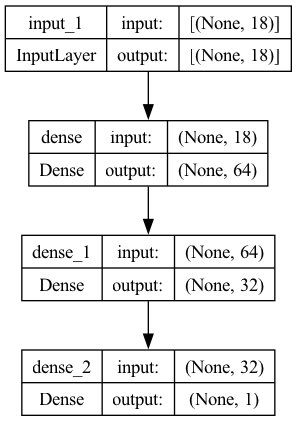

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(trained_models[0], to_file='model.png', show_shapes=True)

In [23]:
trained_history[1].history.keys()

dict_keys(['loss', 'val_loss'])

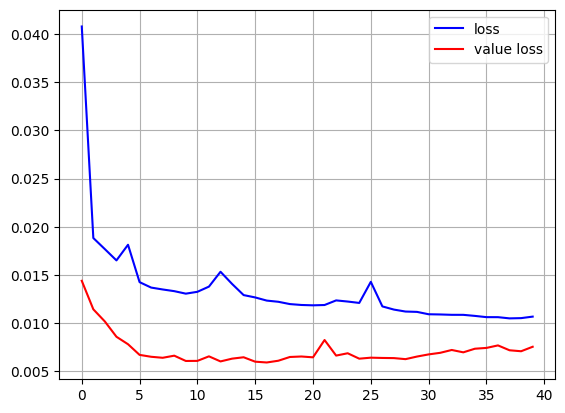

In [29]:
losses_data = pd.DataFrame(trained_history[1].history)
plt.grid(True)
plt.plot(losses_data.index, losses_data["loss"], "-b", label="loss")
plt.plot(losses_data.index, losses_data["val_loss"], "-r", label="value loss")
plt.legend()
plt.show()

In [83]:
losses_data

,loss,val_loss
0,0.033461,0.018466
1,0.023775,0.013496
2,0.016957,0.013061
3,0.016838,0.012591
4,0.014562,0.009897
5,0.014138,0.010005
6,0.015282,0.010895
7,0.019240,0.009863
8,0.016292,0.010669
9,0.013077,0.009045


# Testing the data

In [84]:
#Obtain the data testing sample, date range from 2007-2012
Date_holder = testing_splits[1]["yyyymm"].unique()

In [85]:
# type(testing_splits[1])

In [86]:
# Test_df = testing_splits[1]

In [87]:
# Test_df.reset_index(inplace = True, drop = True)

In [88]:
# Test_df

In [89]:
# Test_data = Test_df[Test_df['yyyymm'] == 201108]
# Test_data.reset_index(inplace = True, drop = True)
# Test_data

In [90]:
# X_test = Test_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
#       "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
#       "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", 
#       "ReturnSkew", "Size", "STreversal", "zerotradeAlt1"]]#Form the input
# y_pred = trained_models[1].predict(X_test)#Get prediction
# #Get the top 20
# y_pred_df = pd.DataFrame(y_pred)
# y_pred_df.columns = ['y_pred']
# Test_data = pd.merge(Test_data, y_pred_df, left_index=True, right_index=True)

In [91]:
# Test_data

In [92]:
# top_20 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(20))
# top_20

In [93]:
#TEST ONLY

# Test_data = Test_df[Test_df['yyyymm'] == 200701]
# X_test = Test_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
#           "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
#           "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", 
#           "ReturnSkew", "Size", "STreversal", "zerotradeAlt1"]]#Form the input
# y_pred = trained_models[1].predict(X_test)#Get prediction
# #Get the top 20
# y_pred_df = pd.DataFrame(y_pred)
# # Rank the values in descending order and select the top 20


In [94]:
# top_20 = pd.DataFrame(y_pred_df.iloc[:, 0].sort_values(ascending=False).head(20))
# top_20.columns = ['y_pred']
# top_20['weight']=0.05
# top_20['return'] = top_20['weight'] * top_20['y_pred']

In [95]:
# top_20_return = top_20['return'].sum()

In [97]:
#Using testing sample from 2007 to 2012 to see whether it works well
portfolio_returns = []
Test_df = testing_splits[1].reset_index()

for Date in Date_holder:#Date rolling forwards(5 years equals 60 months, which means the cycle is 60)
    Test_data = Test_df[Test_df['yyyymm'] == Date]#Filter the data by date
    Test_data.reset_index(inplace = True, drop = True)
    X_test = Test_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]#Form the input
    y_pred = trained_models[1].predict(X_test)#Get prediction
    #Get the top 20
    y_pred_df = pd.DataFrame(y_pred)
    # Rank the values in descending order and select the top 20
    y_pred_df.columns = ['y_pred']
    Test_data = pd.merge(Test_data, y_pred_df, left_index=True, right_index=True)
    top_20 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(20))
    top_20['weight']=0.05
    top_20['return'] = top_20['weight'] * top_20['forward_return_div100']
    top_20_return = top_20['return'].sum()
    # Append the portfolio return to the list
    portfolio_returns.append(top_20_return)
    cumulative_return = np.cumprod(np.array(portfolio_returns) + 1)

# Display the list of portfolio returns
print(cumulative_return)

3/3 [==============================] - 0s 834us/step
[0.99736529 1.01532405 1.05684104 1.09290844 1.08167834 1.03406976
 1.03169833 1.05572382 1.10656147 1.03315986 1.02036133 0.97742735
 0.92070422 0.92789385 0.9583879  0.99735907 0.928301   0.92039533
 0.94809945 0.84504639 0.71439734 0.66812221 0.7011807  0.64578446
 0.57259598 0.64826711 0.79933969 0.84596776 0.83006309 0.93758549
 1.00078237 1.09985187 1.02494043 1.11583498 1.19671997 1.18397806
 1.2440335  1.31903299 1.35644795 1.2473435  1.18249843 1.27485825
 1.21517342 1.32522124 1.37594259 1.36522158 1.44098171 1.47804824
 1.53076923 1.5302037  1.56540032 1.54195363 1.53054362 1.45218361
 1.40658215 1.25013937 1.45253912 1.46023711 1.45557058 1.48486066]


In [98]:
top_20_return

0.020122744495

In [99]:
#Clean the dataframe for plotting
cum_return_df = pd.DataFrame({"cum_return": cumulative_return, "Date": Date_holder})
# cum_return_df.columns = ['cum_return', "Date"]
cum_return_df["Date"] = pd.to_datetime(cum_return_df["Date"], format='%Y%m', errors='coerce')

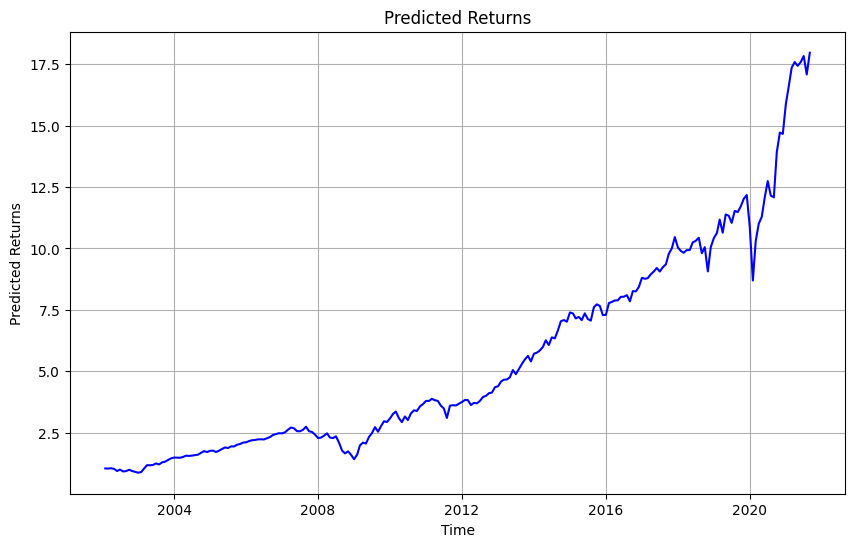

In [137]:
#Plotting
plt.figure(figsize=(10, 6))
plt.plot(cum_return_df["Date"], cum_return_df['cum_return'], "-b", label="loss")
plt.title("Predicted Returns")
plt.xlabel("Time")
plt.ylabel("Predicted Returns")
plt.grid(True)

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.title("Actual vs. Predicted Values")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.grid(True)

# # Add a 45-degree reference line for comparison
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.show()

In [101]:
Test_df = main_df[main_df['yyyymm'] > 200201].reset_index()

In [128]:
#Using data from starting from 2002
Test_df = main_df[main_df['yyyymm'] > 200201].reset_index()
Date_holder = Test_df["yyyymm"].unique()
portfolio_returns_top20 = []
portfolio_returns_top10 = []
portfolio_returns_top5 = []
portfolio_returns_randamu = []

for Date in Date_holder:#Date rolling forwards(5 years equals 60 months, which means the cycle is 60)
    Test_data = Test_df[Test_df['yyyymm'] == Date]#Filter the data by date
    Test_data.reset_index(inplace = True, drop = True)
    X_test = Test_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]#Form the input
    y_pred = trained_models[1].predict(X_test)#Get prediction
    #Get the top 20
    y_pred_df = pd.DataFrame(y_pred)
    # Rank the values in descending order and select the top 20
    y_pred_df.columns = ['y_pred']
    Test_data = pd.merge(Test_data, y_pred_df, left_index=True, right_index=True)
    top_20 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(20))
    top_20['weight']=0.05
    top_20['return'] = top_20['weight'] * top_20['forward_return_div100']
    top_20_return = top_20['return'].sum()
    top_10 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(10))
    top_10['weight']=0.1
    top_10['return'] = top_10['weight'] * top_10['forward_return_div100']
    top_10_return = top_10['return'].sum()
    top_5 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(5))
    top_5['weight']=0.2
    top_5['return'] = top_5['weight'] * top_5['forward_return_div100']
    top_5_return = top_5['return'].sum()
    Randamu = pd.DataFrame(Test_data.sample(n=20, random_state=42))
    Randamu['weight']=0.05
    Randamu['return'] = Randamu['weight'] * Randamu['forward_return_div100']
    Randamu_return = Randamu['return'].sum()
    
    # Append the portfolio return to the list
    portfolio_returns_top20.append(top_20_return)
    portfolio_returns_top10.append(top_10_return)
    portfolio_returns_top5.append(top_5_return)
    portfolio_returns_randamu.append(Randamu_return)
    
cumulative_return_top20 = np.cumprod(np.array(portfolio_returns_top20) + 1)
cumulative_return_top10 = np.cumprod(np.array(portfolio_returns_top10) + 1)
cumulative_return_top5 = np.cumprod(np.array(portfolio_returns_top5) + 1)
cumulative_return_randamu = np.cumprod(np.array(portfolio_returns_randamu) + 1)





3/3 [==============================] - 0s 672us/step


In [130]:
#Transform the cumulative return dataset
cum_return_df_top20 = pd.DataFrame({"cum_return": cumulative_return_top20, "Date": Date_holder})
# cum_return_df.columns = ['cum_return', "Date"]
cum_return_df_top20["Date"] = pd.to_datetime(cum_return_df_top20["Date"], format='%Y%m', errors='coerce')
cum_return_df_top10 = pd.DataFrame({"cum_return": cumulative_return_top10, "Date": Date_holder})
cum_return_df_top10["Date"] = pd.to_datetime(cum_return_df_top10["Date"], format='%Y%m', errors='coerce')
cum_return_df_top5 = pd.DataFrame({"cum_return": cumulative_return_top5, "Date": Date_holder})
cum_return_df_top5["Date"] = pd.to_datetime(cum_return_df_top5["Date"], format='%Y%m', errors='coerce')
cum_return_df_randamu = pd.DataFrame({"cum_return": cumulative_return_randamu, "Date": Date_holder})
cum_return_df_randamu["Date"] = pd.to_datetime(cum_return_df_randamu["Date"], format='%Y%m', errors='coerce')

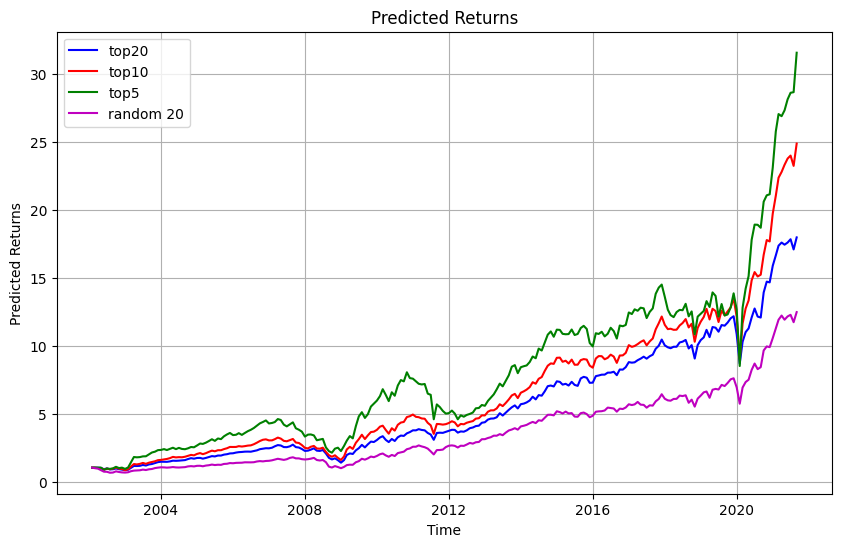

In [135]:
#Plot the graph

plt.figure(figsize=(10, 6))
plt.plot(cum_return_df_top20["Date"], cum_return_df_top20['cum_return'], "-b", label="top20")
plt.plot(cum_return_df_top10["Date"], cum_return_df_top10['cum_return'], "-r", label="top10")
plt.plot(cum_return_df_top5["Date"], cum_return_df_top5['cum_return'], "-g", label="top5")
plt.plot(cum_return_df_randamu["Date"], cum_return_df_randamu['cum_return'], "-m", label="random 20")
plt.title("Predicted Returns")
plt.xlabel("Time")
plt.ylabel("Predicted Returns")
plt.legend()
plt.grid(True)

### Store the model

In [ ]:
import os

# Define a directory where you want to save the models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Iterate through your trained models
for i, model in enumerate(trained_models):
    model_name = f"model_{i + 1}.h5"  # Define a unique name for each model
    model_path = os.path.join(save_dir, model_name)  # Full path to save the model

    # Save the model to the specified path
    model.save(model_path)

    print(f"Model {i + 1} saved to {model_path}")

Model 1 saved to saved_models/model_1.h5
Model 2 saved to saved_models/model_2.h5
Model 3 saved to saved_models/model_3.h5
Model 4 saved to saved_models/model_4.h5


In [136]:
cum_return_df_top20.to_csv('トップ20.csv')
cum_return_df_top10.to_csv('トップ10.csv')
cum_return_df_top5.to_csv('トップ5.csv')
cum_return_df_randamu.to_csv('ランダム.csv')